In [1]:
from jupyterthemes import jtplot
jtplot.style('monokai')

### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [2]:
import numpy as np

In [3]:
m = np.arange(12).reshape((3,4))
print('Overall mean: ', m.flatten().mean())
print('Mean on columns: ', m.mean(axis = 0))
print('Mean on columns: ', m.mean(axis = 1))

Overall mean:  5.5
Mean on columns:  [4. 5. 6. 7.]
Mean on columns:  [1.5 5.5 9.5]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [4]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print('Using outer function in numpy: \n', np.outer(u,v))
print('Using list comprehension: \n', np.array([i * j for i in u for j in v]).reshape(4,4))
print('Using list broadcasting: \n', u * v.reshape(4,1))

Using outer function in numpy: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using list comprehension: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
Using list broadcasting: 
 [[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [5]:
a = np.random.rand(10,6)
line = np.any(a < 0.1, axis = 1)
a[line,:] = 0

print(a)

[[0.         0.         0.         0.         0.         0.        ]
 [0.8854015  0.73408978 0.48616851 0.65857787 0.83396579 0.23167348]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.16866798 0.32720476 0.11599422 0.66143379 0.95257613 0.34367898]
 [0.89466244 0.65825809 0.36283797 0.9366438  0.84277956 0.33415663]
 [0.66629092 0.6313602  0.26910023 0.56723229 0.48178436 0.47229321]
 [0.         0.         0.         0.         0.         0.        ]
 [0.2592779  0.42592349 0.16310395 0.42048938 0.39392092 0.13807912]
 [0.         0.         0.         0.         0.         0.        ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

No handles with labels found to put in legend.


Extracting every 10 elements:
 [0.         0.63466518 1.26933037 1.90399555 2.53866073 3.17332591
 3.8079911  4.44265628 5.07732146 5.71198664]

Reversed array:
 [6.28318531 6.21971879 6.15625227 6.09278575 6.02931923 5.96585272
 5.9023862  5.83891968 5.77545316 5.71198664 5.64852012 5.58505361
 5.52158709 5.45812057 5.39465405 5.33118753 5.26772102 5.2042545
 5.14078798 5.07732146 5.01385494 4.95038842 4.88692191 4.82345539
 4.75998887 4.69652235 4.63305583 4.56958931 4.5061228  4.44265628
 4.37918976 4.31572324 4.25225672 4.1887902  4.12532369 4.06185717
 3.99839065 3.93492413 3.87145761 3.8079911  3.74452458 3.68105806
 3.61759154 3.55412502 3.4906585  3.42719199 3.36372547 3.30025895
 3.23679243 3.17332591 3.10985939 3.04639288 2.98292636 2.91945984
 2.85599332 2.7925268  2.72906028 2.66559377 2.60212725 2.53866073
 2.47519421 2.41172769 2.34826118 2.28479466 2.22132814 2.15786162
 2.0943951  2.03092858 1.96746207 1.90399555 1.84052903 1.77706251
 1.71359599 1.65012947 1.58666296 1

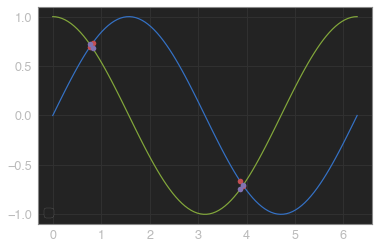

In [6]:
import matplotlib.pyplot as plt

a = np.linspace(0,2*np.pi,100)
print('Extracting every 10 elements:\n', a[::10])
print('\nReversed array:\n', a[::-1])

sin_cos_mask = (np.abs(np.sin(a)-np.cos(a))<0.1)
b = a[sin_cos_mask]
print('\nElements where |sin(a[i])-cos(a[i])|<0.1', b)

plt.plot(a, np.sin(a))
plt.plot(a, np.cos(a))
plt.plot(b, np.sin(b),'o')
plt.plot(b, np.cos(b),'o')
plt.legend()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [7]:
a = np.arange(1,11)
b = a.reshape(10,1)
m = a*b
print('\nThe trace of the matrix m is:\n', np.trace(m))
print('\nThe antidiagonal of the matrix m is:\n', np.fliplr(m).diagonal())
print('\nThe diagonal offset by 1 upward of the matrix m is:\n', np.diag(m,+1))


The trace of the matrix m is:
 385

The antidiagonal of the matrix m is:
 [10 18 24 28 30 30 28 24 18 10]

The diagonal offset by 1 upward of the matrix m is:
 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [8]:
cities = np.array(['Chicago', 'Springfield', 'Saint-Louis', 'Tulsa', 'Oklahoma City', 'Amarillo', 'Santa Fe', 'Albuquerque', 'Flagstaff', 'Los Angeles'])
positions_miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

distances = np.array( [np.abs(x - y) for x in positions_miles for y in positions_miles] )
final = distances.reshape(10,10) * 1.6
print(final)

[[   0.   316.8  484.8 1177.6 1393.6 1880.  2360.  2470.4 3060.8 3916.8]
 [ 316.8    0.   168.   860.8 1076.8 1563.2 2043.2 2153.6 2744.  3600. ]
 [ 484.8  168.     0.   692.8  908.8 1395.2 1875.2 1985.6 2576.  3432. ]
 [1177.6  860.8  692.8    0.   216.   702.4 1182.4 1292.8 1883.2 2739.2]
 [1393.6 1076.8  908.8  216.     0.   486.4  966.4 1076.8 1667.2 2523.2]
 [1880.  1563.2 1395.2  702.4  486.4    0.   480.   590.4 1180.8 2036.8]
 [2360.  2043.2 1875.2 1182.4  966.4  480.     0.   110.4  700.8 1556.8]
 [2470.4 2153.6 1985.6 1292.8 1076.8  590.4  110.4    0.   590.4 1446.4]
 [3060.8 2744.  2576.  1883.2 1667.2 1180.8  700.8  590.4    0.   856. ]
 [3916.8 3600.  3432.  2739.2 2523.2 2036.8 1556.8 1446.4  856.     0. ]]


7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [9]:
#normal prime checker (no optimization)
def prime_mask(numbers):
    prime_mask = np.full((numbers,), True)

    for i in range(numbers):
        for j in range(2,i):
            if i % j == 0:
                prime_mask[i] = False
                
    return prime_mask

scaling = np.arange(1000,10000,1000)
for i in scaling:
    %timeit np.arange(i)[prime_mask(i)] 

31.5 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
132 ms ± 3.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
301 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
547 ms ± 3.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
871 ms ± 4.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.27 s ± 23.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.72 s ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.28 s ± 47.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.36 s ± 578 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
#abnormal prime checker (sieve of Eratosthenes is implemented)
def sieve_of_era(numbers):
    prime_mask = np.full((numbers,), True)
    prime_mask[0] = False
    prime_mask[1] = False
    
    for i in range(2, numbers):
        if prime_mask[i]:
            prime_mask[i * i::i] = False
            
    return prime_mask

scaling = np.arange(1000,10000,1000)
for i in scaling:
    %timeit np.arange(i)[sieve_of_era(i)] 

174 µs ± 4.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
313 µs ± 4.15 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
457 µs ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
580 µs ± 4.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
965 µs ± 317 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
882 µs ± 14.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.07 ms ± 57.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.38 ms ± 193 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.56 ms ± 335 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


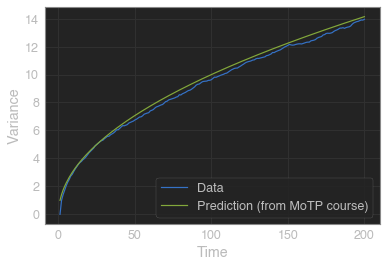

I obtain what I expected.


In [13]:
def walks(walkers, steps):
    m = np.random.randint(0, 2, size = (walkers, steps))
    m[(m == 0)] = -1
    paths = np.zeros((walkers, steps))
    
    for i in range(steps):
        paths[:,i] = m[:,:i].sum(axis = 1)
        
    return paths

paths = walks(1000, 200)
paths_squared = paths ** 2
dev_std = np.sqrt(paths_squared.mean(axis = 0))


time_grid = np.linspace(1, 200, 200)
plt.plot(time_grid, dev_std, label = 'Data')
plt.plot(time_grid, np.sqrt(time_grid), label = 'Prediction (from MoTP course)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Variance')
plt.show()

print('I obtain what I expected.')

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

The dimension of the dataset is:  2


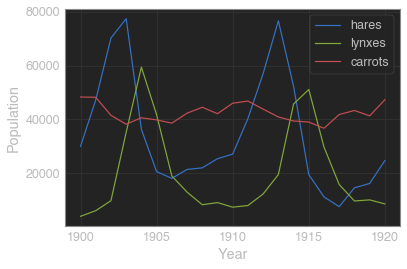

In [14]:
#! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
dataset = np.loadtxt('populations.txt') 
print('The dimension of the dataset is: ', dataset.ndim) #checking if it is a 2D array

years, hares, lynxes, carrots = np.loadtxt('populations.txt', unpack = True) 

plt.plot(years,hares, label = 'hares')
plt.plot(years,lynxes, label = 'lynxes')
plt.plot(years,carrots, label = 'carrots')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

In [15]:
print('In',
      int(years[-1] - years[0]),
      'years, the average of hares is:',
      np.trunc(np.mean(hares)),
      '+-',
      np.trunc(np.std(hares) / hares.shape[0]),
      'animals')

print('In',
      int(years[-1] - years[0]),
      'years, the average of lynxes is:',
      np.trunc(np.mean(lynxes)),
      '+-',
      np.trunc(np.std(lynxes) / lynxes.shape[0]),
      'animals')

print('In',
      int(years[-1] - years[0]),
      'years, the average of carrots is:',
      np.trunc(np.mean(carrots)),
      '+-',
      np.trunc(np.std(carrots) / carrots.shape[0]),
      'vegetables')

print('Carrots have the highest average population each year.')

In 20 years, the average of hares is: 34080.0 +- 995.0 animals
In 20 years, the average of lynxes is: 20166.0 +- 774.0 animals
In 20 years, the average of carrots is: 42400.0 +- 158.0 vegetables
Carrots have the highest average population each year.


I can see clearly that there is an evident correlation between hares and lynxes, since the population of the latter increases accordingly to an increase in population of rabbits (delayed). So I try to plot how the correlation changes when I 'shift' the years.

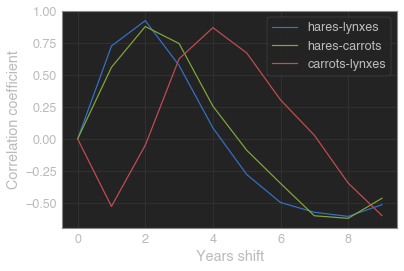

In [16]:
a = np.zeros(10)
for i in range(1,10):
    hares_shifted = hares[:-i]
    lynxes_shifted = lynxes[i:]
    a[i] = np.corrcoef(hares_shifted, lynxes_shifted)[0][1]
    
b = np.zeros(10)
for i in range(1,10):
    carrots_shifted = carrots[:-i]
    hares_shifted = hares[i:]
    b[i] = np.corrcoef(carrots_shifted, hares_shifted)[0][1]
    
c = np.zeros(10)
for i in range(1,10):
    carrots_shifted = carrots[:-i]
    lynxes_shifted = lynxes[i:]
    c[i] = np.corrcoef(lynxes_shifted, carrots_shifted)[0][1]
    
plt.plot(a, label = 'hares-lynxes')
plt.plot(b, label = 'hares-carrots')
plt.plot(c, label = 'carrots-lynxes')
plt.legend()
plt.ylabel('Correlation coefficient')
plt.xlabel('Years shift')
plt.show()